**Task-05**: CREDIT CARD FRAUD DETECTION

**Author**: B. Priyanka

**Batch**: October- November

**Domain**: Data Science

**Aim**: To perform a Credit card fraud detection that helps to identify and prevent unauthorized or fraudulent transactions using advanced algorithms and data analysis.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [2]:
df = pd.read_csv('/content/B. Priyanka creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5974 entries, 0 to 5973
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5974 non-null   int64  
 1   V1      5974 non-null   float64
 2   V2      5974 non-null   float64
 3   V3      5974 non-null   float64
 4   V4      5974 non-null   float64
 5   V5      5974 non-null   float64
 6   V6      5974 non-null   float64
 7   V7      5974 non-null   float64
 8   V8      5974 non-null   float64
 9   V9      5974 non-null   float64
 10  V10     5974 non-null   float64
 11  V11     5974 non-null   float64
 12  V12     5974 non-null   float64
 13  V13     5974 non-null   float64
 14  V14     5974 non-null   float64
 15  V15     5974 non-null   float64
 16  V16     5974 non-null   float64
 17  V17     5974 non-null   float64
 18  V18     5973 non-null   float64
 19  V19     5973 non-null   float64
 20  V20     5973 non-null   float64
 21  V21     5973 non-null   float64
 22  

In [4]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [5]:
df['Class'].unique()

array([ 0.,  1., nan])

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,5974.0,2677.615501,1765.025532,0.000000,1162.250000,2537.000000,3781.750000,6645.000000
V1,5974.0,-0.266159,1.395405,-12.168192,-1.015749,-0.420703,1.115402,1.685314
V2,5974.0,0.285505,1.208867,-15.732974,-0.280054,0.346083,0.941548,7.467017
V3,5974.0,0.844231,1.031448,-12.389545,0.295701,0.882882,1.504158,4.101716
V4,5974.0,0.104200,1.442339,-4.657545,-0.839417,0.161767,1.071412,6.013346
V5,5974.0,0.000709,1.185900,-32.092129,-0.609206,-0.083983,0.441406,10.658654
V6,5974.0,0.194948,1.365525,-7.465603,-0.677720,-0.142606,0.605784,21.393069
V7,5974.0,0.018324,1.059870,-12.968670,-0.492968,0.041761,0.566306,34.303177
V8,5974.0,-0.039006,1.304005,-23.632502,-0.189736,0.037831,0.343067,3.877662
V9,5974.0,0.396916,1.047749,-3.336805,-0.264280,0.360826,0.961662,9.272376


Feature Engineering

In [7]:
df['hour']= round(df['Time']/3600)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,hour
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,0.0


In [8]:
class_count = df['Class'].value_counts() #Count total number of rows of each classes.
class_count

0.0    5970
1.0       3
Name: Class, dtype: int64

In [9]:
duplicated_count = df.duplicated().sum()
duplicated_count

36

In [10]:
df = df.drop_duplicates(keep='first')

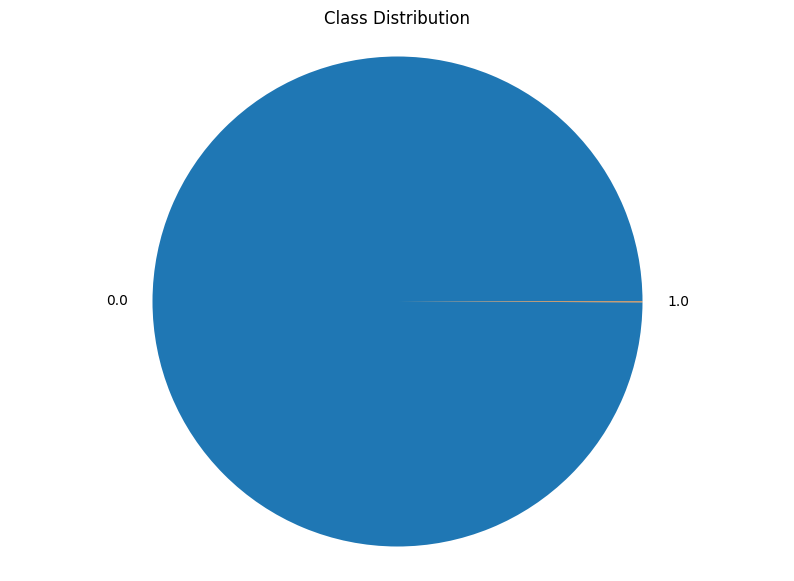

In [11]:
fig = plt.figure(figsize=(10, 7))
labels = class_count.index
data = class_count.values

plt.pie(data, labels=labels)
plt.title('Class Distribution')
plt.axis('equal')
plt.show()

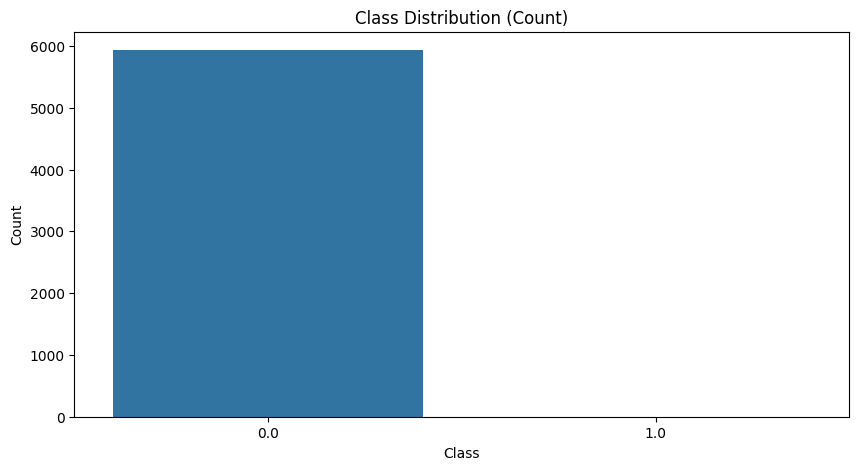

In [12]:
plt.figure(figsize=(10, 5))
sns.countplot(data = df, x='Class')
plt.title('Class Distribution (Count)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

<Axes: >

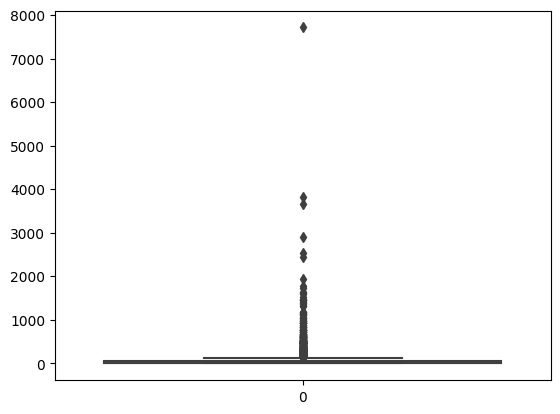

In [13]:
sns.boxplot(df['Amount'])

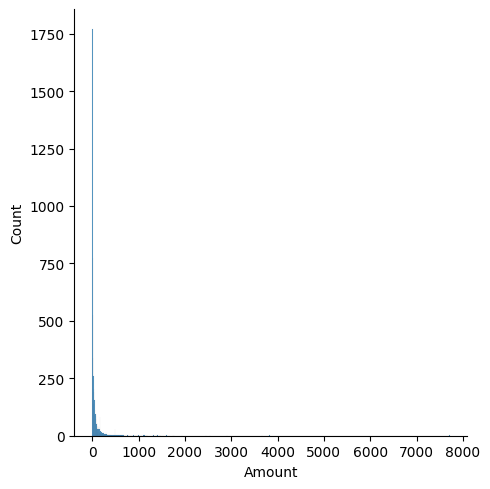

In [14]:
sns.displot(df['Amount']) #plotting distribution plot to check skewness of our data
plt.show()

In [15]:
df['Amount'].skew()

16.21110839513955

In [16]:
pt = PowerTransformer(method='yeo-johnson')   #power transformer is use for reduction of skewness of our data
df['Amount'] = pt.fit_transform(df[['Amount']])
df['Amount'].skew()

0.03079143788853674

<ipython-input-17-ae7ad042f4b6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Amount'])


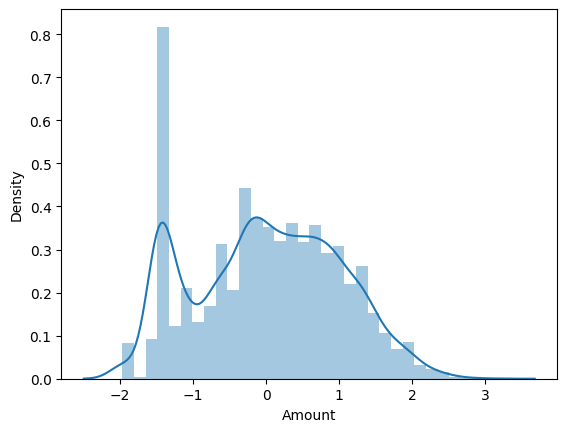

In [17]:
sns.distplot(df['Amount'])
plt.show()

<Axes: >

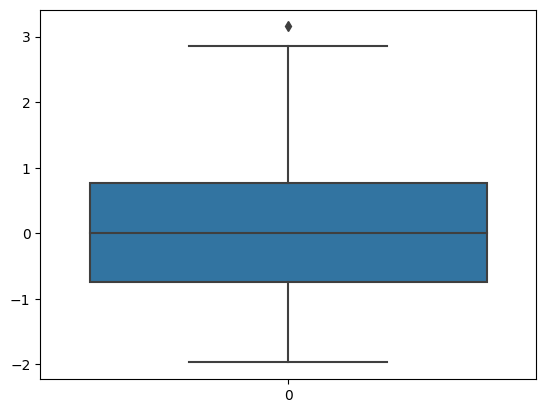

In [18]:
scaler = StandardScaler()

df['Amount'] = scaler.fit_transform(df[['Amount']])

sns.boxplot(df['Amount'])

In [19]:
outliers = df['Amount'] > 3 # counting outliers
outliers.count()

5938

In [20]:
df['Amount']=df['Amount'] < 3 #dropping outliers
class_count

0.0    5970
1.0       3
Name: Class, dtype: int64

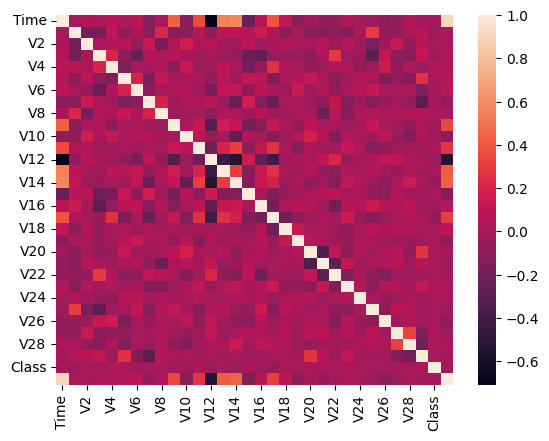

In [21]:
sns.heatmap(df.corr())    # checking correlation of each feature to our Label
plt.show()

In [22]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'hour'],
      dtype='object')

In [23]:
x = df.drop(columns = ['Class'])
y = df['Class']

In [25]:
import numpy as np

# Assuming y contains NaN values
nan_indices = np.isnan(y)
x = x[~nan_indices]
y = y[~nan_indices]

# Now, you can proceed with the train-test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=101, stratify=y)

Logistic Regression

In [26]:
model = LogisticRegression(class_weight = 'balanced') #creating model

model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [29]:
train_pred = model.predict(x_train)

In [30]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4747
         1.0       0.22      1.00      0.36         2

    accuracy                           1.00      4749
   macro avg       0.61      1.00      0.68      4749
weighted avg       1.00      1.00      1.00      4749



In [31]:
test_pred = model.predict(x_test)

In [32]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1187
         1.0       0.17      1.00      0.29         1

    accuracy                           1.00      1188
   macro avg       0.58      1.00      0.64      1188
weighted avg       1.00      1.00      1.00      1188



Random classifier Forest

In [35]:
model_r = RandomForestClassifier(class_weight = 'balanced')

In [34]:
model_r.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced')

In [37]:
from sklearn.ensemble import RandomForestClassifier
model_r = RandomForestClassifier()
model_r.fit(x_train, y_train)
trainpred = model_r.predict(x_train)
from sklearn.metrics import classification_report
print(classification_report(y_train, trainpred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4747
         1.0       1.00      1.00      1.00         2

    accuracy                           1.00      4749
   macro avg       1.00      1.00      1.00      4749
weighted avg       1.00      1.00      1.00      4749



In [38]:
testpred = model_r.predict(x_test)

print(classification_report(y_test,testpred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1187
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00      1188
   macro avg       0.50      0.50      0.50      1188
weighted avg       1.00      1.00      1.00      1188



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


XGBoost

In [39]:
model_X = xgb.XGBClassifier()
model_X.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [40]:
train_x_pred = model_X.predict(x_train)

print(classification_report(y_train,train_x_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4747
         1.0       0.00      0.00      0.00         2

    accuracy                           1.00      4749
   macro avg       0.50      0.50      0.50      4749
weighted avg       1.00      1.00      1.00      4749



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
test_x_pred = model_r.predict(x_test)

print(classification_report(y_test,test_x_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1187
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00      1188
   macro avg       0.50      0.50      0.50      1188
weighted avg       1.00      1.00      1.00      1188



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
